# Problem Set 3

Franklin She, Selina Li

## Problem 1. Gradient Descent

In [6]:
import numpy as np

def gradient_descent(f, x0, grad_f, s, epsilon, gamma):
    """
    Implements gradient descent to minimize a given function f.
    
    Parameters:
    - f: The function to minimize.
    - x0: The starting point.
    - grad_f: The gradient of f.
    - s: A function that calculates the step size.
    - epsilon: The stopping criterion threshold.
    - gamma: A tuning parameter for the step size function.
    
    Returns:
    - The approximate minimum point of f.
    """
    # Initialize the current point xk
    xk = x0
    # Initialize iteration counter
    k = 0
    
    # Perform the gradient descent iteration
    while np.linalg.norm(grad_f(xk)) > epsilon:
        # Calculate the step size
        sz = s(f, grad_f(xk), k, xk, gamma)
        # Update the current point
        xk = xk - sz * grad_f(xk)
        # Increment the iteration counter
        k += 1
    
    return xk


In [16]:
def constant_step_size(f, grad_f_xk, k, xk, gamma=0.01):
    """
    Returns a constant step size.
    
    Parameters:
    - f, grad_f_xk, k, xk: Parameters as required by the step size function specification.
    - gamma: The constant step size to use.
    
    Returns:
    - A constant step size (gamma).
    """
    return gamma

def decreasing_step_size(f, grad_f_xk, k, xk, gamma=None):
    """
    Returns a step size that decreases with the number of iterations.
    
    Parameters:
    - f, grad_f_xk, k, xk: Parameters as required by the step size function specification.
    - gamma: Not used in this function, present for compatibility.
    
    Returns:
    - A step size that decreases with k (1/k).
    """
    return 1.0 / (k + 1)  # Avoid division by zero for k=0 by using k+1

def backtracking_line_search(f, grad_f_xk, k, xk, gamma=0.9, alpha=0.5, beta=0.5):
    """
    Performs a backtracking line search to find the step size.
    
    Parameters:
    - f: The function to minimize.
    - grad_f_xk: The gradient of f evaluated at xk.
    - k: Iteration index.
    - xk: The current point.
    - gamma: The reduction factor for the step size.
    - alpha: Controls the required decrease in f.
    - beta: The proportion of the gradient's effect to consider.
    
    Returns:
    - The step size determined by backtracking line search.
    """
    step_size = 1.0  # Start with a step size of 1
    # Check the Armijo-Goldstein condition
    while f(xk - step_size * grad_f_xk) > f(xk) - alpha * step_size * np.dot(grad_f_xk, grad_f_xk):
        step_size *= gamma  # Reduce the step size by a factor of gamma
    return step_size


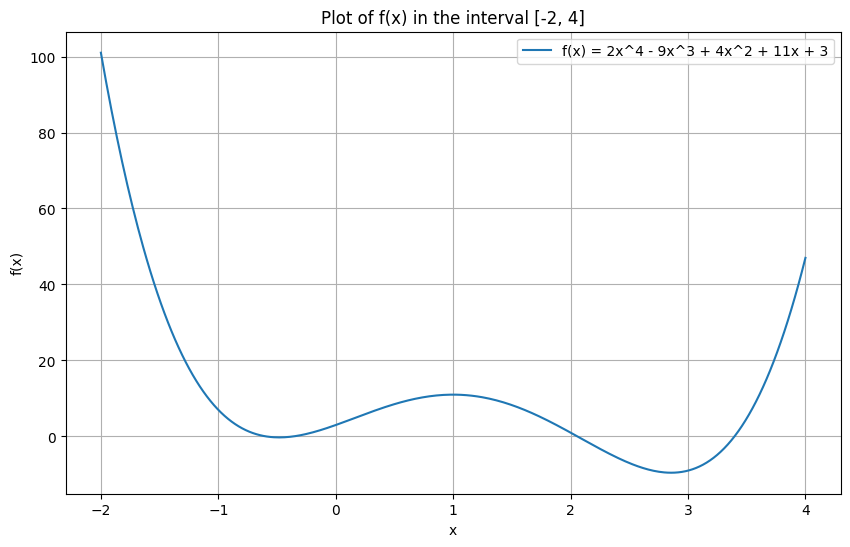

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function f(x)
def f(x):
    return 2*x**4 - 9*x**3 + 4*x**2 + 11*x + 3

# Generate x values from -2 to 4
x_values = np.linspace(-2, 4, 400)
# Calculate y values using the function f(x)
y_values = f(x_values)

# Plotting the function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x) = 2x^4 - 9x^3 + 4x^2 + 11x + 3')
plt.title('Plot of f(x) in the interval [-2, 4]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


We can observe that the function does not appear to be convex over the entire interval $[−2,4]$. The function exhibits multiple local minima and maxima, indicating non-convexity.

In [26]:
from time import time

# Define the gradient of the function f(x)
def grad_f(x):
    return 8*x**3 - 27*x**2 + 8*x + 11

# Implement gradient descent with timing and iteration tracking
def gradient_descent_experiment(f, grad_f, x0, epsilon, step_size_function, gamma):
    """
    Performs gradient descent with a specific step size function and tracks iterations and timing.
    
    Parameters:
    - f: The function to minimize.
    - grad_f: The gradient of f.
    - x0: The starting point.
    - epsilon: The stopping criterion threshold.
    - step_size_function: The function to determine the step size.
    - gamma: A parameter for the step size function.
    
    Returns:
    - Final x value (minimum point approximation).
    - Number of iterations.
    - Total time taken.
    """
    start_time = time()
    xk = x0  # Initialize starting point
    k = 0  # Initialize iteration counter
    while np.abs(grad_f(xk)) > epsilon:
        sz = step_size_function(f, grad_f(xk), k, xk, gamma)
        update = sz * grad_f(xk)  # Calculate the update
        xk = np.clip(xk - update, -10, 10)  # Apply the update with clipping
        k += 1
    total_time = time() - start_time
    return xk, k, total_time

# Setup for experiments
x0_values = [-2, 1]  # Starting points
epsilon = 0.001  # Stopping criterion
gamma_values = [0.01, None, 0.9]  # Gamma values for each step size method
step_size_functions = [constant_step_size, decreasing_step_size, backtracking_line_search]  # Step size methods

# Placeholder for results
results = {}

# Perform experiments for each starting point and step size function
for x0 in x0_values:
    for gamma, step_size_function in zip(gamma_values, step_size_functions):
        key = f"x0={x0}, step_size={step_size_function.__name__}, gamma={gamma}"
        results[key] = gradient_descent_experiment(f, grad_f, x0, epsilon, step_size_function, gamma)

# Print results in a nice table
print("Results of gradient descent experiments:")
print()
print("{:<60} {:<20} {:<20} {:<20}".format('Experiment', 'Minimum point', 'Iterations', 'Time (s)'))
print("-" * 100)
for key, (xk, k, total_time) in results.items():
    print("{:<60} {:<20} {:<20} {:<20}".format(key, xk, k, total_time))



Results of gradient descent experiments:

Experiment                                                   Minimum point        Iterations           Time (s)            
----------------------------------------------------------------------------------------------------
x0=-2, step_size=constant_step_size, gamma=0.01              -0.4813622130992625  21                   0.00042700767517089844
x0=-2, step_size=decreasing_step_size, gamma=None            2.8563980388727837   369                  0.0032122135162353516
x0=-2, step_size=backtracking_line_search, gamma=0.9         2.8563963582983516   7                    0.002748250961303711
x0=1, step_size=constant_step_size, gamma=0.01               1                    0                    1.0013580322265625e-05
x0=1, step_size=decreasing_step_size, gamma=None             1                    0                    4.0531158447265625e-06
x0=1, step_size=backtracking_line_search, gamma=0.9          1                    0                    3.0

The starting point greatly influences the outcome of gradient descent. When $x=−2$, the algorithm converges to different points based on the step size method, demonstrating sensitivity to the initial guess. For $x = 1$, gradient descent stops immediately due to the gradient here being zero (it's a local maximum). This highlights that the starting point can determine both the convergence speed and the final solution.

We can say that $x=1$ is an unlucky starting point.


## Problem 2. Covexity of OLS

## Problem 3. Quickfire

### 1.

Optimization is relevant for machine learning because

### 2.

### 3.

### 4.

